# Name : Aishwarya Donegiri
# USC ID : 4640782493

# Homework 1

# 1. (a) Combined Cycle Power Plant Data Set

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
dataset=pd.read_excel("../data/CCPP/Folds5x2_pp.xlsx")
dataset

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


# (b) Exploring the data

# i. Row count, column count and their significance

In [3]:
row_count, column_count=dataset.shape
print ("Number of rows : ",row_count)
print ("Number of columns : ",column_count)

Number of rows :  9568
Number of columns :  5


The given dataset contains 9568 datapoints with each row representing a single datapoint with values for the 4 independent variables and one dependent variable. The columns hold categorical data i.e., the values of each of the 4 attribute (independent variables) are in 4 columns and the values of the output (dependent variable) are in one column. 

# ii. Pairwise Scatterplots of all variables

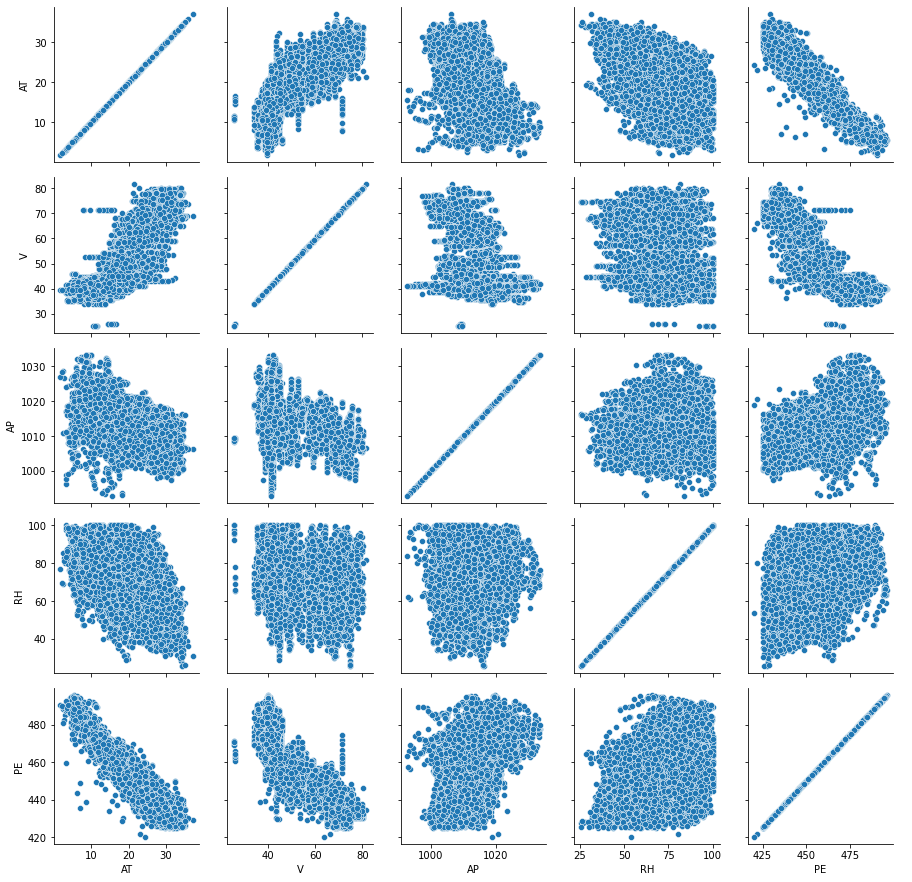

In [4]:
g=sns.PairGrid(dataset)
g.map(sns.scatterplot)
g.add_legend()

Findings from the scatterplot:
1. There is a negative correlation between Net hourly Electrical energy output(PE or EP) and the Temperature(AT).
2. Though AT and V are from different turbines, it looks like there is positive correlation between the two.
3. There is negative correlation in between EP(or PE) and V.
4. There is very little positive  to no correlation between PE and AP.
5. All other variables have negligable to no correlation between them.

# iii. Descriptive Statistics

In [5]:
desc=dataset.describe()
desc

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [6]:
desc.loc['median']=[np.median(dataset[column]) for column in dataset.columns]
desc.loc['range']=desc.loc['max']-desc.loc['min']
desc.loc['First quartile range']=desc.loc['25%']
desc.loc['Third quartile range']=desc.loc['75%']
desc.loc['Interquartile range']=desc.loc['Third quartile range']-desc.loc['First quartile range']
desc=desc.drop(index=['count','std','min','25%','50%','75%','max'])
print ("Descriptive Statistics")
desc

Descriptive Statistics


,AT,V,AP,RH,PE
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
median,20.345000,52.080000,1012.940000,74.975000,451.550000
range,35.300000,56.200000,40.410000,74.600000,75.500000
First quartile range,13.510000,41.740000,1009.100000,63.327500,439.750000
Third quartile range,25.720000,66.540000,1017.260000,84.830000,468.430000
Interquartile range,12.210000,24.800000,8.160000,21.502500,28.680000


# (c) Simple Linear Regression

In [7]:
y=dataset.iloc[:,-1].to_numpy().reshape(-1,1)
print ("Output Values : \n")
print (y)

Output Values : 

[[463.26]
 [444.37]
 [488.56]
 ...
 [429.57]
 [435.74]
 [453.28]]


Simple Linear Regression model using AT as the predictor:

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Intercept :  497.03411989276674
Coefficients :  [-2.17131996]
R2 score :  0.8989475964148236
Mean Squared Error :  29.431702011093524


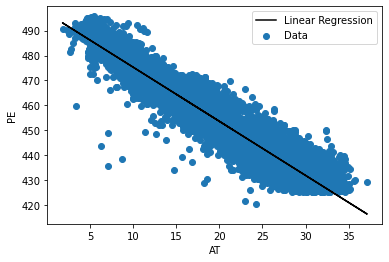

In [9]:
AT=dataset['AT'].to_numpy().reshape(-1,1)
model_AT=LinearRegression()
model_AT.fit(AT,y)
y_AT=model_AT.predict(AT)
print ("Intercept : ", model_AT.intercept_[0])
print ("Coefficients : ", model_AT.coef_[0])
print ("R2 score : ",model_AT.score(AT,y))
print ("Mean Squared Error : ", mean_squared_error(y,y_AT))
plt.scatter(AT,y,label='Data')
plt.plot(AT,y_AT,color="black", label='Linear Regression')
plt.xlabel("AT")
plt.ylabel('PE')
plt.legend()

Checking for outliers

<AxesSubplot:xlabel='AT'>

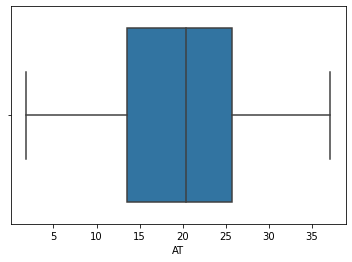

In [10]:
sns.boxplot(data=dataset,x="AT")

According to the boxplot, there are no outliers in the values of attribute AT

Simple Linear Regression model using V as the predictor:

Intercept :  517.801526308386
Coefficients :  [-1.16813513]
R2 score :  0.7565177870683979
Mean Squared Error :  70.91465103018828


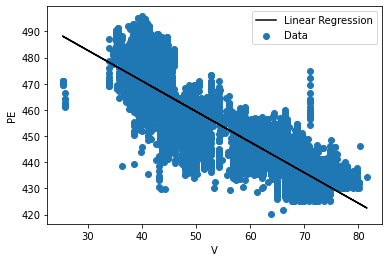

In [11]:
V=dataset['V'].to_numpy().reshape(-1,1)
model_V=LinearRegression()
model_V.fit(V,y)
y_V=model_V.predict(V)
print ("Intercept : ", model_V.intercept_[0])
print ("Coefficients : ", model_V.coef_[0])
print ("R2 score : ",model_V.score(V,y))
print ("Mean Squared Error : ", mean_squared_error(y,y_V))
plt.scatter(V,y,label='Data')
plt.plot(V,y_V,color="black", label='Linear Regression')
plt.xlabel("V")
plt.ylabel('PE')
plt.legend()

Checking for outliers

<AxesSubplot:xlabel='V'>

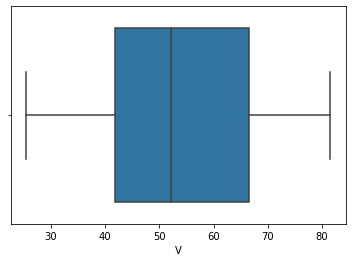

In [12]:
sns.boxplot(data=dataset,x="V")

According to the boxplot, there are no outliers in the values of attribute V.

Simple Linear Regression model using AP as the predictor:

Intercept :  -1055.2609889844396
Coefficients :  [1.48987167]
R2 score :  0.2687686564110674
Mean Squared Error :  212.9724998331263


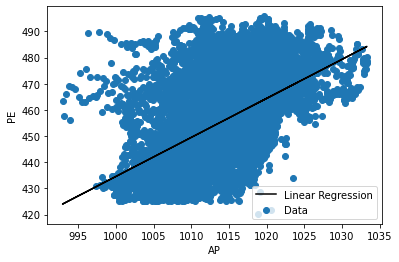

In [13]:
AP=dataset['AP'].to_numpy().reshape(-1,1)
model_AP=LinearRegression()
model_AP.fit(AP,y)
y_AP=model_AP.predict(AP)
print ("Intercept : ", model_AP.intercept_[0])
print ("Coefficients : ", model_AP.coef_[0])
print ("R2 score : ",model_AP.score(AP,y))
print ("Mean Squared Error : ", mean_squared_error(y,y_AP))
plt.scatter(AP,y,label='Data')
plt.plot(AP,y_AP,color="black", label='Linear Regression')
plt.xlabel("AP")
plt.ylabel('PE')
plt.legend()

Checking for outliers

<AxesSubplot:xlabel='AP'>

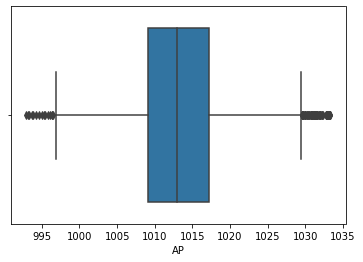

In [14]:
sns.boxplot(data=dataset,x="AP")

According to the boxplot, the values of the attribute AP outside the range ~997 to ~1029 are outliers

Simple Linear Regression model using RF as the predictor:

Intercept :  420.96176615548393
Coefficients :  [0.4556501]
R2 score :  0.15193944023117578
Mean Squared Error :  246.99922809296348


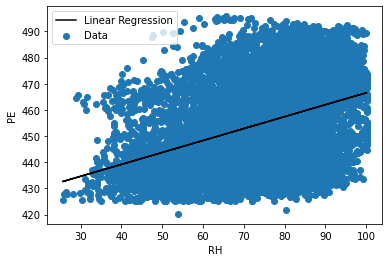

In [15]:
RH=dataset['RH'].to_numpy().reshape(-1,1)
model_RH=LinearRegression()
model_RH.fit(RH,y)
y_RH=model_RH.predict(RH)
print ("Intercept : ", model_RH.intercept_[0])
print ("Coefficients : ", model_RH.coef_[0])
print ("R2 score : ",model_RH.score(RH,y))
print ("Mean Squared Error : ", mean_squared_error(y,y_RH))
plt.scatter(RH,y,label='Data')
plt.plot(RH,y_RH,color="black", label='Linear Regression')
plt.xlabel("RH")
plt.ylabel('PE')
plt.legend()

Checking for outliers

<AxesSubplot:xlabel='RH'>

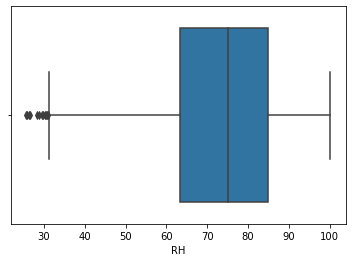

In [16]:
sns.boxplot(data=dataset,x="RH")

According to the boxplot, the values of the attribute RH less than 31 are outliers.

# (d). Multiple regression

In [17]:
X_multiple=dataset.iloc[:,:-1].to_numpy()
model_multiple=LinearRegression()
model_multiple.fit(X_multiple,y)
y_multiple=model_multiple.predict(X_multiple)
print ("Intercept : ", model_multiple.intercept_[0])
print ("Coefficients : ", model_multiple.coef_[0])
print ("R2 score : ",model_multiple.score(X_multiple,y))
print ("Mean Squared Error : ", mean_squared_error(y,y_multiple))

Intercept :  454.6092743153103
Coefficients :  [-1.97751311 -0.23391642  0.06208294 -0.1580541 ]
R2 score :  0.9286960898122536
Mean Squared Error :  20.767397532535014


In [18]:
import statsmodels.api as sm
est = sm.OLS(y, X_multiple)
est2 = est.fit()
print (est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.939e+07
Date:                Fri, 25 Sep 2020   Prob (F-statistic):                        0.00
Time:                        18:12:10   Log-Likelihood:                         -29068.
No. Observations:                9568   AIC:                                  5.814e+04
Df Residuals:                    9564   BIC:                                  5.817e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

From the above stats all the p values are 0 and therefore all the X values are correlated.


# (e) Comparing coefficients from univariate linear regression to multiple regression

Text(0, 0.5, 'Coefficients from multiple regression')

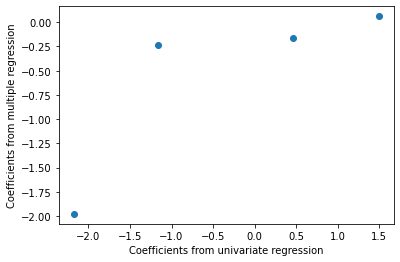

In [19]:
coeff_uni=[model_AT.coef_[0][0],model_V.coef_[0][0],model_AP.coef_[0][0],model_RH.coef_[0][0]]
coeff_mul=model_multiple.coef_[0]
plt.scatter(coeff_uni,coeff_mul)
plt.xlabel("Coefficients from univariate regression")
plt.ylabel("Coefficients from multiple regression")

In [20]:
df = pd.DataFrame(list(zip(coeff_uni,list(coeff_mul))),index=['AT','V','AP','RH'], 
               columns =['Univariate', 'Multiple']) 
print ("Table with values : ")
df

Table with values : 


,Univariate,Multiple
AT,-2.171320,-1.977513
V,-1.168135,-0.233916
AP,1.489872,0.062083
RH,0.455650,-0.158054


Comparison of results:
1. The coefficient values are higher for multiple regression than univariate regression for AT and V which affect the value of PE more.
2. The coefficient values are higher for univariate regression than multiple regression for AP and RH which affect the value of PE less. 

# (f) Polynomial Regression of degree 3 for each attribute 

using AT as the predictor

In [21]:
from sklearn.preprocessing import PolynomialFeatures

Intercept :  492.72814333734135
Coefficients :  [ 0.         -0.61034571 -0.12513818  0.00267485]
R2 score :  0.9118826627742724
Mean Squared Error :  25.66433968146689


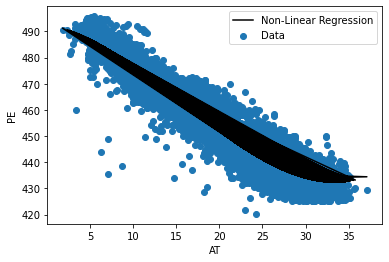

In [22]:
AT_poly=PolynomialFeatures(degree=3).fit_transform(AT.reshape(-1,1))
model_AT_poly=LinearRegression()
model_AT_poly.fit(AT_poly,y)
y_AT_poly=model_AT_poly.predict(AT_poly)
print ("Intercept : ", model_AT_poly.intercept_[0])
print ("Coefficients : ", model_AT_poly.coef_[0])
print ("R2 score : ",model_AT_poly.score(AT_poly,y))
print ("Mean Squared Error : ", mean_squared_error(y,y_AT_poly))
plt.scatter(AT,y,label='Data')
plt.plot(AT,y_AT_poly,color="black", label='Non-Linear Regression')
plt.xlabel("AT")
plt.ylabel('PE')
plt.legend()

using V as the predictor

Intercept :  554.1468490634976
Coefficients :  [ 0.00000000e+00 -2.14437732e+00 -2.71228490e-03  1.34357110e-04]
R2 score :  0.7750219775589421
Mean Squared Error :  65.52527085562213


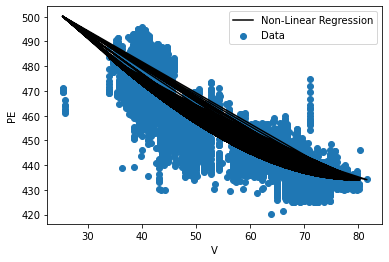

In [23]:
V_poly=PolynomialFeatures(degree=3).fit_transform(V)
model_V_poly=LinearRegression()
model_V_poly.fit(V_poly,y)
y_V_poly=model_V_poly.predict(V_poly)
print ("Intercept : ", model_V_poly.intercept_[0])
print ("Coefficients : ", model_V_poly.coef_[0])
print ("R2 score : ",model_V_poly.score(V_poly,y))
print ("Mean Squared Error : ", mean_squared_error(y,y_V_poly))
plt.scatter(V,y,label='Data')
plt.plot(V,y_V_poly,color="black", label='Non-Linear Regression')
plt.xlabel("V")
plt.ylabel('PE')
plt.legend()

using AP as the predictor

Intercept :  5236219.86958893
Coefficients :  [ 0.00000000e+00 -1.54608659e+04  1.52162523e+01 -4.99115985e-03]
R2 score :  0.2975434657774766
Mean Squared Error :  204.59178265419905


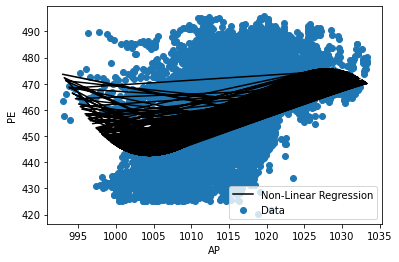

In [24]:
AP_poly=PolynomialFeatures(degree=3).fit_transform(AP)
model_AP_poly=LinearRegression()
model_AP_poly.fit(AP_poly,y)
y_AP_poly=model_AP_poly.predict(AP_poly)
print ("Intercept : ", model_AP_poly.intercept_[0])
print ("Coefficients : ", model_AP_poly.coef_[0])
print ("R2 score : ",model_AP_poly.score(AP_poly,y))
print ("Mean Squared Error : ", mean_squared_error(y,y_AP_poly))
plt.scatter(AP,y,label='Data')
plt.plot(AP,y_AP_poly,color="black", label='Non-Linear Regression')
plt.xlabel("AP")
plt.ylabel('PE')
plt.legend()

using RH as the predictor

Intercept :  468.41353597137424
Coefficients :  [ 0.00000000e+00 -1.72921131e+00  3.21451721e-02 -1.52187969e-04]
R2 score :  0.15374253544345973
Mean Squared Error :  246.47407323169548


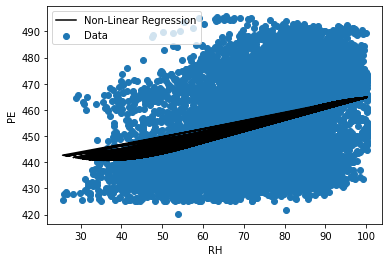

In [25]:
RH_poly=PolynomialFeatures(degree=3).fit_transform(RH)
model_RH_poly=LinearRegression()
model_RH_poly.fit(RH_poly,y)
y_RH_poly=model_RH_poly.predict(RH_poly)
print ("Intercept : ", model_RH_poly.intercept_[0])
print ("Coefficients : ", model_RH_poly.coef_[0])
print ("R2 score : ",model_RH_poly.score(RH_poly,y))
print ("Mean Squared Error : ", mean_squared_error(y,y_RH_poly))
plt.scatter(RH,y,label='Data')
plt.plot(RH,y_RH_poly,color="black", label='Non-Linear Regression')
plt.xlabel("RH")
plt.ylabel('PE')
plt.legend()

Checking for non-linear association using R2 scores

In [26]:
R2_scores_linear=[model_AT.score(AT,y),model_V.score(V,y),model_AP.score(AP,y),model_RH.score(RH,y)]
R2_scores_poly=[model_AT_poly.score(AT_poly,y), model_V_poly.score(V_poly,y),model_AP_poly.score(AP_poly,y),model_RH_poly.score(RH_poly,y)]
R2_scores = pd.DataFrame(list(zip(R2_scores_linear,R2_scores_poly)),index=['AT','V','AP','RH'], 
               columns =['Linear Regression', 'Non-linear Regression']) 
print ("Comparision of R2 scores for all attributes : ")
R2_scores

Comparision of R2 scores for all attributes : 


,Linear Regression,Non-linear Regression
AT,0.898948,0.911883
V,0.756518,0.775022
AP,0.268769,0.297543
RH,0.151939,0.153743


Findings from the table:
1. From the above values, it can be inferred that there is ~0.02 increase in R2 score by using non-linear/polynomial regression for attributes AT, V and AP, which means that there is a nonlinear association between these predictors and response PE.
2. There is only a ~0.001 increase in R2 score for RH using non-linear/polynomial regression, so there might be little to no nonlinear association between the predictor RH and response PE.

# (g) Non-linear Regression with all pairwise attributes 

In [27]:
X=dataset.iloc[:,:-1]
poly=PolynomialFeatures(interaction_only=True)
X_poly_int=poly.fit_transform(X)
model_poly_int=LinearRegression()
model_poly_int.fit(X_poly_int,y)
y_poly_int=model_poly_int.predict(X_poly_int)
features_poly_int=poly.get_feature_names()
print ("Features : ",poly.get_feature_names() )
print ("Intercept : ", model_poly_int.intercept_[0])
print ("Coefficients : ", model_poly_int.coef_[0])
print ("R2 score : ",model_poly_int.score(X_poly_int,y))
print ("Mean Squared Error : ", mean_squared_error(y,y_poly_int))

Features :  ['1', 'x0', 'x1', 'x2', 'x3', 'x0 x1', 'x0 x2', 'x0 x3', 'x1 x2', 'x1 x3', 'x2 x3']
Intercept :  685.7824681470386
Coefficients :  [ 0.00000000e+00 -4.34701412e+00 -7.67485763e+00 -1.52354642e-01
  1.57090705e+00  2.09709231e-02  1.75904518e-03 -5.23035364e-03
  6.81235433e-03  8.38633179e-04 -1.61179894e-03]
R2 score :  0.9363057529178327
Mean Squared Error :  18.55106888539468


In the above observation x0, x1, x2, x3 correspond to AT, V, AP, RH respectively.

In [28]:
est_poly = sm.OLS(y, X_poly_int).fit()
print (est_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        18:12:14   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

The features in the summary correspond to features mentioned above.
The findings from full linear regression model with paiwise interaction terms:
1. From above summary, the terms with p-values>0.05 are AT, AT AP,V RH 
2. Therefore, statistically significant interactions are all interactions except AT AP and V RH.

# (h) Improving model using possible interactions

Train-test split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)
print ("X_train :\n")
print (X_train,"\n")
print ("y_train :\n")
print (y_train,"\n")
print ("X_test :\n")
print (X_test,"\n")
print ("y_test :\n")
print (y_test,"\n")

X_train :

         AT      V       AP     RH
1783  24.64  58.49  1011.20  72.67
4790  30.65  71.98  1004.92  63.39
2926  20.37  69.48  1011.04  84.31
3392  20.30  56.53  1020.27  76.49
516   10.07  44.68  1023.44  90.95
...     ...    ...      ...    ...
6514   1.81  39.42  1026.92  76.97
5773  10.72  40.81  1016.51  80.26
4242  26.55  69.45  1013.92  52.22
7431  28.73  50.05  1005.79  52.40
1281  26.54  66.51  1015.39  51.22

[6697 rows x 4 columns] 

y_train :

[[444.95]
 [429.85]
 [445.81]
 ...
 [434.55]
 [436.35]
 [440.04]] 

X_test :

         AT      V       AP     RH
4374  32.00  73.17  1009.92  42.47
8795  13.74  38.73  1004.34  82.82
2682  17.12  68.28  1003.56  94.29
5072  13.92  41.16  1000.98  83.89
3936   6.43  39.61  1017.51  83.80
...     ...    ...      ...    ...
6772  12.34  43.22  1009.28  78.23
9435  29.53  71.97  1008.60  79.25
1200   7.26  36.08  1021.47  83.15
1918  11.72  40.92  1023.35  88.55
2939  17.03  43.99  1021.50  82.32

[2871 rows x 4 columns] 

y_test

# Model with all Predictors

In [30]:
model_all=LinearRegression()
model_all.fit(X_train,y_train)
y_all_train=model_all.predict(X_train)
y_all_test=model_all.predict(X_test)
print ("Intercept : ", model_all.intercept_[0])
print ("Coefficients : ", model_all.coef_[0])
print ("R2 score for training data: ",model_all.score(X_train,y_train))
print ("R2 score for test data: ",model_all.score(X_test,y_test))
print ("MSE for training data : ", mean_squared_error(y_train,y_all_train))
print ("MSE for test data : ", mean_squared_error(y_test,y_all_test))

Intercept :  449.4930950654164
Coefficients :  [-1.96079767 -0.23717698  0.06691485 -0.15643464]
R2 score for training data:  0.9272528629065864
R2 score for test data:  0.9319157940122004
MSE for training data :  21.253752227359435
MSE for test data :  19.657240168939403


In [31]:
X_train

,AT,V,AP,RH
1783,24.64,58.49,1011.20,72.67
4790,30.65,71.98,1004.92,63.39
2926,20.37,69.48,1011.04,84.31
3392,20.30,56.53,1020.27,76.49
516,10.07,44.68,1023.44,90.95
...,...,...,...,...
6514,1.81,39.42,1026.92,76.97
5773,10.72,40.81,1016.51,80.26
4242,26.55,69.45,1013.92,52.22
7431,28.73,50.05,1005.79,52.40


In [32]:
X_test

,AT,V,AP,RH
4374,32.00,73.17,1009.92,42.47
8795,13.74,38.73,1004.34,82.82
2682,17.12,68.28,1003.56,94.29
5072,13.92,41.16,1000.98,83.89
3936,6.43,39.61,1017.51,83.80
...,...,...,...,...
6772,12.34,43.22,1009.28,78.23
9435,29.53,71.97,1008.60,79.25
1200,7.26,36.08,1021.47,83.15
1918,11.72,40.92,1023.35,88.55


In [33]:
est_all = sm.OLS(y_train,X_train).fit()
print (est_all.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.336e+07
Date:                Fri, 25 Sep 2020   Prob (F-statistic):                        0.00
Time:                        18:12:14   Log-Likelihood:                         -20395.
No. Observations:                6697   AIC:                                  4.080e+04
Df Residuals:                    6693   BIC:                                  4.082e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

All features are statistically significant.

# Model with all predictors, pairwise predictors and quadratic predictors

In [34]:
poly_all=PolynomialFeatures()
X_poly_all_train=poly_all.fit_transform(X_train)
X_poly_all_test=poly_all.fit_transform(X_test)
model_poly_all=LinearRegression()
model_poly_all.fit(X_poly_all_train,y_train)
y_poly_all_train=model_poly_all.predict(X_poly_all_train)
y_poly_all_test=model_poly_all.predict(X_poly_all_test)
features_poly_all=poly.get_feature_names()
print ("Features : ",poly_all.get_feature_names() )
print ("Intercept : ", model_poly_all.intercept_[0])
print ("Coefficients : ", model_poly_all.coef_[0])
print ("R2 score for training data: ",model_poly_all.score(X_poly_all_train,y_train))
print ("R2 score for test data: ",model_poly_all.score(X_poly_all_test,y_test))
print ("MSE for training data : ", mean_squared_error(y_train,y_poly_all_train))
print ("MSE for test data : ", mean_squared_error(y_test,y_poly_all_test))

Features :  ['1', 'x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2', 'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2']
Intercept :  -6214.444746812096
Coefficients :  [ 0.00000000e+00 -9.72300161e+00 -1.14380891e+00  1.30596043e+01
  3.78611898e+00  2.00232066e-02  8.99255082e-03  6.92356603e-03
 -4.65939068e-03 -1.15209476e-03  8.01295413e-04 -3.33604114e-04
 -6.33945069e-03 -3.48562907e-03 -1.79752993e-03]
R2 score for training data:  0.9364946640633067
R2 score for test data:  0.9407607969689155
MSE for training data :  18.553674124392526
MSE for test data :  17.10351504440342


In [35]:
pd.DataFrame(X_poly_all_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,24.64,58.49,1011.20,72.67,607.1296,1441.1936,24915.9680,1790.5888,3421.0801,59145.0880,4250.4683,1.022525e+06,73483.9040,5280.9289
1,1.0,30.65,71.98,1004.92,63.39,939.4225,2206.1870,30800.7980,1942.9035,5181.1204,72334.1416,4562.8122,1.009864e+06,63701.8788,4018.2921
2,1.0,20.37,69.48,1011.04,84.31,414.9369,1415.3076,20594.8848,1717.3947,4827.4704,70247.0592,5857.8588,1.022202e+06,85240.7824,7108.1761
3,1.0,20.30,56.53,1020.27,76.49,412.0900,1147.5590,20711.4810,1552.7470,3195.6409,57675.8631,4323.9797,1.040951e+06,78040.4523,5850.7201
4,1.0,10.07,44.68,1023.44,90.95,101.4049,449.9276,10306.0408,915.8665,1996.3024,45727.2992,4063.6460,1.047429e+06,93081.8680,8271.9025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6692,1.0,1.81,39.42,1026.92,76.97,3.2761,71.3502,1858.7252,139.3157,1553.9364,40481.1864,3034.1574,1.054565e+06,79042.0324,5924.3809
6693,1.0,10.72,40.81,1016.51,80.26,114.9184,437.4832,10896.9872,860.3872,1665.4561,41483.7731,3275.4106,1.033293e+06,81585.0926,6441.6676
6694,1.0,26.55,69.45,1013.92,52.22,704.9025,1843.8975,26919.5760,1386.4410,4823.3025,70416.7440,3626.6790,1.028034e+06,52946.9024,2726.9284
6695,1.0,28.73,50.05,1005.79,52.40,825.4129,1437.9365,28896.3467,1505.4520,2505.0025,50339.7895,2622.6200,1.011614e+06,52703.3960,2745.7600


In [36]:
pd.DataFrame(X_poly_all_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,32.00,73.17,1009.92,42.47,1024.0000,2341.4400,32317.4400,1359.0400,5353.8489,73895.8464,3107.5299,1.019938e+06,42891.3024,1803.7009
1,1.0,13.74,38.73,1004.34,82.82,188.7876,532.1502,13799.6316,1137.9468,1500.0129,38898.0882,3207.6186,1.008699e+06,83179.4388,6859.1524
2,1.0,17.12,68.28,1003.56,94.29,293.0944,1168.9536,17180.9472,1614.2448,4662.1584,68523.0768,6438.1212,1.007133e+06,94625.6724,8890.6041
3,1.0,13.92,41.16,1000.98,83.89,193.7664,572.9472,13933.6416,1167.7488,1694.1456,41200.3368,3452.9124,1.001961e+06,83972.2122,7037.5321
4,1.0,6.43,39.61,1017.51,83.80,41.3449,254.6923,6542.5893,538.8340,1568.9521,40303.5711,3319.3180,1.035327e+06,85267.3380,7022.4400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2866,1.0,12.34,43.22,1009.28,78.23,152.2756,533.3348,12454.5152,965.3582,1867.9684,43621.0816,3381.1006,1.018646e+06,78955.9744,6119.9329
2867,1.0,29.53,71.97,1008.60,79.25,872.0209,2125.2741,29783.9580,2340.2525,5179.6809,72588.9420,5703.6225,1.017274e+06,79931.5500,6280.5625
2868,1.0,7.26,36.08,1021.47,83.15,52.7076,261.9408,7415.8722,603.6690,1301.7664,36854.6376,3000.0520,1.043401e+06,84935.2305,6913.9225
2869,1.0,11.72,40.92,1023.35,88.55,137.3584,479.5824,11993.6620,1037.8060,1674.4464,41875.4820,3623.4660,1.047245e+06,90617.6425,7841.1025


In [37]:
est_all_poly = sm.OLS(y_train,X_poly_all_train).fit()
print (est_all_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     7038.
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        18:12:15   Log-Likelihood:                -19282.
No. Observations:                6697   AIC:                         3.859e+04
Df Residuals:                    6682   BIC:                         3.870e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6214.4447   1437.843     -4.322      0.0

The predictors with p>0.05 are AT,V, AT AP, V AP, V RH.
Out of these AT, V are significant because there are other significant predictors based on them.
Therefore the non significant predictors based on p-values are AT AP, V AP, V RH.

# Removing non-significant predictors

In [38]:
X_sig_train=(pd.DataFrame(X_poly_all_train)).drop(columns=[7,10,11])
X_sig_train

,0,1,2,3,4,5,6,8,9,12,13,14
0,1.0,24.64,58.49,1011.20,72.67,607.1296,1441.1936,1790.5888,3421.0801,1.022525e+06,73483.9040,5280.9289
1,1.0,30.65,71.98,1004.92,63.39,939.4225,2206.1870,1942.9035,5181.1204,1.009864e+06,63701.8788,4018.2921
2,1.0,20.37,69.48,1011.04,84.31,414.9369,1415.3076,1717.3947,4827.4704,1.022202e+06,85240.7824,7108.1761
3,1.0,20.30,56.53,1020.27,76.49,412.0900,1147.5590,1552.7470,3195.6409,1.040951e+06,78040.4523,5850.7201
4,1.0,10.07,44.68,1023.44,90.95,101.4049,449.9276,915.8665,1996.3024,1.047429e+06,93081.8680,8271.9025
...,...,...,...,...,...,...,...,...,...,...,...,...
6692,1.0,1.81,39.42,1026.92,76.97,3.2761,71.3502,139.3157,1553.9364,1.054565e+06,79042.0324,5924.3809
6693,1.0,10.72,40.81,1016.51,80.26,114.9184,437.4832,860.3872,1665.4561,1.033293e+06,81585.0926,6441.6676
6694,1.0,26.55,69.45,1013.92,52.22,704.9025,1843.8975,1386.4410,4823.3025,1.028034e+06,52946.9024,2726.9284
6695,1.0,28.73,50.05,1005.79,52.40,825.4129,1437.9365,1505.4520,2505.0025,1.011614e+06,52703.3960,2745.7600


In [39]:
X_sig_test=(pd.DataFrame(X_poly_all_test)).drop(columns=[7,10,11])
X_sig_test

,0,1,2,3,4,5,6,8,9,12,13,14
0,1.0,32.00,73.17,1009.92,42.47,1024.0000,2341.4400,1359.0400,5353.8489,1.019938e+06,42891.3024,1803.7009
1,1.0,13.74,38.73,1004.34,82.82,188.7876,532.1502,1137.9468,1500.0129,1.008699e+06,83179.4388,6859.1524
2,1.0,17.12,68.28,1003.56,94.29,293.0944,1168.9536,1614.2448,4662.1584,1.007133e+06,94625.6724,8890.6041
3,1.0,13.92,41.16,1000.98,83.89,193.7664,572.9472,1167.7488,1694.1456,1.001961e+06,83972.2122,7037.5321
4,1.0,6.43,39.61,1017.51,83.80,41.3449,254.6923,538.8340,1568.9521,1.035327e+06,85267.3380,7022.4400
...,...,...,...,...,...,...,...,...,...,...,...,...
2866,1.0,12.34,43.22,1009.28,78.23,152.2756,533.3348,965.3582,1867.9684,1.018646e+06,78955.9744,6119.9329
2867,1.0,29.53,71.97,1008.60,79.25,872.0209,2125.2741,2340.2525,5179.6809,1.017274e+06,79931.5500,6280.5625
2868,1.0,7.26,36.08,1021.47,83.15,52.7076,261.9408,603.6690,1301.7664,1.043401e+06,84935.2305,6913.9225
2869,1.0,11.72,40.92,1023.35,88.55,137.3584,479.5824,1037.8060,1674.4464,1.047245e+06,90617.6425,7841.1025


# Fitting the new feature set to a model

In [40]:
model_new=LinearRegression()
model_new.fit(X_sig_train,y_train)
y_sig_train=model_new.predict(X_sig_train)
y_sig_test=model_new.predict(X_sig_test)
print ("Intercept : ", model_new.intercept_[0])
print ("Coefficients : ", model_new.coef_[0])
print ("R2 score for training data: ",model_new.score(X_sig_train,y_train))
print ("R2 score for test data: ",model_new.score(X_sig_test,y_test))
print ("MSE for training data : ", mean_squared_error(y_train,y_sig_train))
print ("MSE for test data : ", mean_squared_error(y_test,y_sig_test))

Intercept :  -9487.510455980502
Coefficients :  [ 0.00000000e+00 -2.43016454e+00 -3.39503252e-01  1.91857217e+01
  6.08728210e+00  1.64973211e-02  9.21910076e-03 -6.96123693e-03
 -1.33858189e-03 -9.20169609e-03 -5.69748760e-03 -2.04397022e-03]
R2 score for training data:  0.9363655051964466
R2 score for test data:  0.940720106383263
MSE for training data :  18.591409087772416
MSE for test data :  17.115263211297354


# (i) KNN Regression

# KNN regression using raw features

In [41]:
from sklearn.neighbors import KNeighborsRegressor

In [42]:
knn_regressor_raw=KNeighborsRegressor()
knn_regressor_raw.fit(X_train,y_train)
y_knn_raw_train=knn_regressor_raw.predict(X_train)
y_knn_raw_test=knn_regressor_raw.predict(X_test)
print ("R2 score for training data: ",knn_regressor_raw.score(X_train,y_train))
print ("R2 score for test data: ",knn_regressor_raw.score(X_test,y_test))
print ("MSE for training data : ", mean_squared_error(y_train,y_knn_raw_train))
print ("MSE for test data : ", mean_squared_error(y_test,y_knn_raw_test))

R2 score for training data:  0.9629410647862484
R2 score for test data:  0.9461951585571237
MSE for training data :  10.827112355383013
MSE for test data :  15.534508703587601


# Finding ideal k for KNN regression using raw features

In [43]:
train_error_raw=[]
test_error_raw=[]
for k in range(1,101):
    knn_regressor_raw=KNeighborsRegressor(n_neighbors=k)
    knn_regressor_raw.fit(X_train,y_train)
    y_knn_raw_train=knn_regressor_raw.predict(X_train)
    y_knn_raw_test=knn_regressor_raw.predict(X_test)
    train_error_raw.append(1-knn_regressor_raw.score(X_train,y_train))
    test_error_raw.append(1-knn_regressor_raw.score(X_test,y_test))
print ("Training Error :\n")
knn_train_error_raw=pd.DataFrame({'Train Error':train_error_raw})
knn_train_error_raw.index+=1
knn_train_error_raw

Training Error :



,Train Error
1,0.000000
2,0.019236
3,0.027946
4,0.033665
5,0.037059
...,...
96,0.075314
97,0.075452
98,0.075588
99,0.075691


In [44]:
print ("Test Error :\n")
knn_test_error_raw=pd.DataFrame({'Test Error':test_error_raw})
knn_test_error_raw.index+=1
knn_test_error_raw

Test Error :



,Test Error
1,0.074811
2,0.060649
3,0.055822
4,0.054983
5,0.053805
...,...
96,0.076326
97,0.076483
98,0.076638
99,0.076856


Train and Test Error vs 1/k


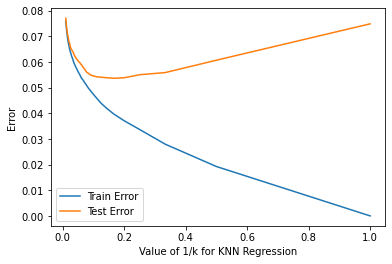

In [45]:
print ("Train and Test Error vs 1/k")
plt.plot([1/k for k in range(1,101)],train_error_raw,label='Train Error')
plt.plot([1/k for k in range(1,101)],test_error_raw,label='Test Error')
plt.xlabel('Value of 1/k for KNN Regression')
plt.ylabel('Error')
plt.legend()

Finding k which gives the best fit i.e., the least test error

In [46]:
k_star=pd.Series(range(1,101)).loc[np.argmin(test_error_raw)]
print ("k* which gives the best fit : ",k_star)

k* which gives the best fit :  6


Running KNN Regression for k=6

In [47]:
knn_regressor_raw=KNeighborsRegressor(n_neighbors=k_star)
knn_regressor_raw.fit(X_train,y_train)
y_knn_raw_train=knn_regressor_raw.predict(X_train)
y_knn_raw_test=knn_regressor_raw.predict(X_test)
print ("R2 score for training data: ",knn_regressor_raw.score(X_train,y_train))
print ("R2 score for test data: ",knn_regressor_raw.score(X_test,y_test))
print ("MSE for training data : ", mean_squared_error(y_train,y_knn_raw_train))
print ("MSE for test data : ", mean_squared_error(y_test,y_knn_raw_test))

R2 score for training data:  0.9603628941339291
R2 score for test data:  0.9463893846907617
MSE for training data :  11.580348873459096
MSE for test data :  15.47843182495452


# KNN regression using normalized features

Normalizing Features

In [48]:
from sklearn.preprocessing import normalize

In [49]:
X_train_n=normalize(X_train)
print ("Normalised X_train : \n")
pd.DataFrame(X_train_n, columns=['AT','V','AP','RH'])

Normalised X_train : 



,AT,V,AP,RH
0,0.024257,0.057581,0.995479,0.071540
1,0.030348,0.071271,0.995018,0.062765
2,0.020027,0.068310,0.994013,0.082890
3,0.019807,0.055157,0.995488,0.074632
4,0.009791,0.043442,0.995086,0.088430
...,...,...,...,...
6692,0.001756,0.038251,0.996472,0.074688
6693,0.010504,0.039988,0.996045,0.078644
6694,0.026081,0.068223,0.996009,0.051298
6695,0.028479,0.049613,0.997010,0.051943


In [50]:
X_test_n=normalize(X_test)
print ("Normalised X_test : \n")
pd.DataFrame(X_test_n, columns=['AT','V','AP','RH'])

Normalised X_test : 



,AT,V,AP,RH
0,0.031559,0.072162,0.996013,0.041885
1,0.013623,0.038400,0.995790,0.082115
2,0.016943,0.067575,0.993196,0.093316
3,0.013845,0.040938,0.995576,0.083437
4,0.006293,0.038767,0.995857,0.082017
...,...,...,...,...
2866,0.012178,0.042653,0.996028,0.077203
2867,0.029102,0.070928,0.993993,0.078102
2868,0.007079,0.035183,0.996061,0.081082
2869,0.011400,0.039803,0.995423,0.086133


In [51]:
knn_regressor_n=KNeighborsRegressor()
knn_regressor_n.fit(X_train_n,y_train)
y_knn_n_train=knn_regressor_n.predict(X_train_n)
y_knn_n_test=knn_regressor_n.predict(X_test_n)
print ("R2 score for training data: ",knn_regressor_n.score(X_train_n,y_train))
print ("R2 score for test data: ",knn_regressor_n.score(X_test_n,y_test))
print ("MSE for training data : ", mean_squared_error(y_train,y_knn_n_train))
print ("MSE for test data : ", mean_squared_error(y_test,y_knn_n_test))

R2 score for training data:  0.9582599046295305
R2 score for test data:  0.9390791188479681
MSE for training data :  12.1947568027475
MSE for test data :  17.58904836642285


# Finding ideal k for KNN regression using normalized features

In [ ]:
train_error_n=[]
test_error_n=[]
for k in range(1,101):
    knn_regressor_n=KNeighborsRegressor(n_neighbors=k)
    knn_regressor_n.fit(X_train_n,y_train)
    y_knn_n_train=knn_regressor_n.predict(X_train_n)
    y_knn_n_test=knn_regressor_n.predict(X_test_n)
    train_error_n.append(1-knn_regressor_n.score(X_train_n,y_train))
    test_error_n.append(1-knn_regressor_n.score(X_test_n,y_test))
print ("Training Error :\n")
knn_train_error_n=pd.DataFrame({'Train Error':train_error_n})
knn_train_error_n.index+=1
knn_train_error_n

In [ ]:
print ("Test Error :\n")
knn_test_error_n=pd.DataFrame({'Test Error':test_error_n})
knn_test_error_n.index+=1
knn_test_error_n

In [ ]:
print ("Train and Test Error vs 1/k")
plt.plot([1/k for k in range(1,101)],train_error_n,label='Train Error')
plt.plot([1/k for k in range(1,101)],test_error_n,label='Test Error')
plt.xlabel('Value of 1/k for KNN Regression')
plt.ylabel('Error')
plt.legend()

Finding k which gives the best fit i.e., the least test error

In [ ]:
k_star=pd.Series(range(1,101)).loc[np.argmin(test_error_n)]
print ("k* which gives the best fit : ",k_star)

Performming knn for k=10 

In [ ]:
knn_regressor_n=KNeighborsRegressor(n_neighbors=k_star)
knn_regressor_n.fit(X_train_n,y_train)
y_knn_n_train=knn_regressor_n.predict(X_train_n)
y_knn_n_test=knn_regressor_n.predict(X_test_n)
print ("R2 score for training data: ",knn_regressor_n.score(X_train_n,y_train))
print ("R2 score for test data: ",knn_regressor_n.score(X_test_n,y_test))
print ("MSE for training data : ", mean_squared_error(y_train,y_knn_n_train))
print ("MSE for test data : ", mean_squared_error(y_test,y_knn_n_test))

# (j) Comparing the results of KNN regression and Linear Regression models

In [ ]:
print ("MSE for test data - KNN Regression using raw features",mean_squared_error(y_test,y_knn_raw_test))
print ("MSE for test data - KNN Regression using normalized features",mean_squared_error(y_test,y_knn_n_test))

In [ ]:
print ("MSE for test data - Linear Regression using all predictors ", mean_squared_error(y_test,y_all_test))
print ("MSE for test data - Linear Regression using all predictors, pairwise predictors and quadratic predictors ", 
       mean_squared_error(y_test,y_poly_all_test))
print ("MSE for test data - Linear Regression after removing non-significant predictors ",
       mean_squared_error(y_test,y_sig_test))

Analysis:
1. The mean squared error has reduced on using other non-linear predictors in addition to the linear predictors.
2. The Non-linear regression curve fits the dataset well compared to linear regressor.
3. By removing non-significant predictors, the unnecessary predictors influencing the regression have been dropped.
4. KNN regression with raw features works better compared to the one with normalised features in this case.

From this data, it can be inferred that KNN Regression using raw features gives the least Test Error on the current dataset.

# 2. ISLR 2.4.1

# (a) n is large, p is small

The performance of a flexible statistical learning method would be **better** compared to an inflexible method here because, the number of data points available is large enough to fit the model accurately while being able to avoid the complexity of a inflexible model. Less  parameters also ensures that there is no overfitting because there is less variance.

# (b) p is extremely large, n is small

The performance of a flexible statistical learning method would be **worse** compared to an inflexible method here because,the complexity of the model will ensure that there is no overfitting which can occur due to the high variance.

# (c) relationship between predictors and response is highly non-linear

The performance of a flexible statistical learning method would be **better** compared to an inflexible method here because, a simple model would be able to capture the essence of the data and also since there is a non-linear relationship, the flexible models allow for a better fit, due to their nature of not being highly restrictive.

# (d) The variance of the error terms is extremely high

The performance of a flexible statistical learning method would be **worse** compared to an inflexible method here because, the flexible model would take into account the variance of the error to predict the output and therefor overfit, whereas a complex model would not be affected by it.

# 3. ISLR 2.4.7

The data is as follows:

| Obs  | $X_{1}$ | $X_{2}$ | $X_{3}$ | Y   |
|:-----|:--------|:--------|:--------|----:|
|1     |        0|        3|        0|Red  |
|2     |        2|        0|        0|Red  |
|3     |        0|        1|        3|Red  |
|4     |        0|        1|        2|Green|
|5     |       -1|        0|        1|Green|
|6     |        1|        1|        1|Red  |

<h4> Test Point X=Y=Z=0</h4>

<h3> (a) Euclidian distance between each observationa and the test point </h3>

Formula to calculate Euclidian distance between two points ($X_{i}$,$Y_{i}$,$Z_{i}$) and ($X_{j}$,$Y_{j}$,$Z_{j}$) is
$$\sqrt{(X_{j}-X_{i})^2+(Y_{j}-Y_{i})^2+(Z_{j}-Z_{i})^2}$$
1. $X_{1}$=0 $X_{2}$=3 $X_{3}$=0
$$= \sqrt{(0-0)^2+(3-0)^2+(0-0)^2}$$
$$= \sqrt{3^2}$$
$$= 3$$
2. $X_{1}$=2 $X_{2}$=0 $X_{3}$=0
$$= \sqrt{(2-0)^2+(0-0)^2+(0-0)^2}$$
$$= \sqrt{2^2}$$
$$= \sqrt{4}$$
$$= 2$$
3. $X_{1}$=0 $X_{2}$=1 $X_{3}$=3
$$= \sqrt{(0-0)^2+(1-0)^2+(3-0)^2}$$
$$= \sqrt{1^2+3^2}$$
$$= \sqrt{10}$$
$$= 3.162$$
4. $X_{1}$=0 $X_{2}$=1 $X_{3}$=2
$$= \sqrt{(0-0)^2+(1-0)^2+(2-0)^2}$$
$$= \sqrt{1^2+2^2}$$
$$= \sqrt{5}$$
$$= 2.236$$
5. $X_{1}$=-1 $X_{2}$=0 $X_{3}$=1
$$= \sqrt{(-1-0)^2+(0-0)^2+(1-0)^2}$$
$$= \sqrt{1^2+1^2}$$
$$= 1.414$$
6. $X_{1}$=1 $X_{2}$=1 $X_{3}$=1
$$= \sqrt{(1-0)^2+(1-0)^2+(1-0)^2}$$
$$= \sqrt{3}$$
$$= 1.732$$

<h3> (b) k=1

At k=1, the neighbor would be Observation 5 at a distance of 1.414. Therefore the answer would be **Green**.

<h3> (c) k=3 </h3>

At k=3, the neighbors would be 
- Observation 5 at distance of 1.414 which is Green
- Observation 6 at distance of 1.732 which is Red
- Observation 2 at distance of 2 which is Red

By majority polling, the test point would be **Red**

<h3> (d) Bayes decision boundary is non-linear </h3>

If the decision boundary is non-linear, k should be small to accommodate the non-restrictive nature of the boundary.